In [1]:
import sys
sys.path.append('../pestools')
import matplotlib.pyplot as plt
import matplotlib as mpl
from identpar import IdentPar
from res import *

% matplotlib inline

C:\Anaconda\lib\site-packages\PIL\Image.py:81: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)
C:\Anaconda\lib\site-packages\PIL\Image.py:81: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)


In [2]:
mpl.rcParams['font.family'] = 'Arial'

In [3]:
res = Res('../cc/columbia_svda.rei.16', obs_info_file='../cc/observation_locations.csv')

NameError: name 'Res' is not defined

In [4]:
res.df.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual
7089222501_b,7089222501_b,head_best,858.13,850.1707,7.959346,0.2,1.591869,7.959346,1.591869,2.534048
1089192101_b,1089192101_b,head_best,893.24,891.5156,1.724436,0.2,0.344887,1.724436,0.344887,0.118947
2089103101_b,2089103101_b,head_best,924.60,909.9240,14.675990,0.2,2.935198,14.675990,2.935198,8.615387
3089103201_b,3089103201_b,head_best,911.44,910.1028,1.337156,0.2,0.267431,1.337156,0.267431,0.071519
2089475301_b,2089475301_b,head_best,729.25,733.7051,-4.455139,0.2,-0.891028,4.455139,0.891028,0.793931


In [5]:
res.obsinfo.head()

,X,Y,Type,Group
7089222501_b,570954.8275,296365.6586,head,head_best
1089192101_b,575025.8740,304202.1060,head,head_best
2089103101_b,586985.0743,304340.3521,head,head_best
3089103201_b,586962.2041,304370.9770,head,head_best
2089475301_b,536391.8551,305263.7315,head,head_best


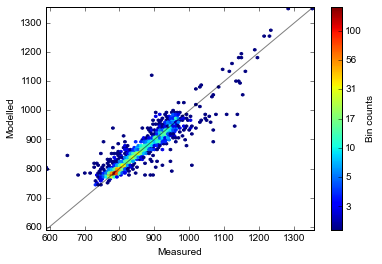

In [6]:
fig, ax = res.plot_hexbin(['WCRs1'])

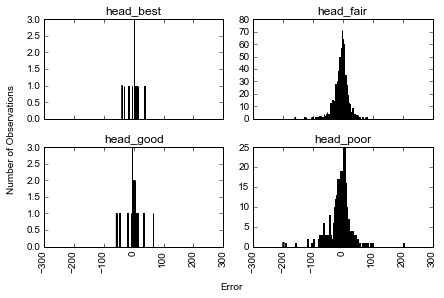

In [7]:
fig, axes = res.plot_hist(groupinfo=['head_best', 'head_good', 'head_fair', 'head_poor'], color='k')

###Identifiability
* Indentifiability is computed using Jeremy's errvar class in pyemu
* ancillary information on parameters (such as location, zones, values, etc.) can be read in using the par_info_file argument


In [2]:
ip = IdentPar('../cc/columbia.jco', par_info_file='../cc/parinfo.csv')

2015-04-03 10:45:08.535000 starting: pre-loading base components
2015-04-03 10:45:08.535000 starting: loading jco: ../cc/columbia.jco
2015-04-03 10:45:08.595000 finished: loading jco: ../cc/columbia.jco took: 0:00:00.060000
2015-04-03 10:45:08.595000 starting: loading pst: ../cc/columbia.pst
2015-04-03 10:45:08.632000 finished: loading pst: ../cc/columbia.pst took: 0:00:00.037000
2015-04-03 10:45:08.632000 starting: loading parcov
2015-04-03 10:45:08.713000 finished: loading parcov took: 0:00:00.081000
2015-04-03 10:45:08.713000 starting: loading obscov
2015-04-03 10:45:09.127000 finished: loading obscov took: 0:00:00.414000
2015-04-03 10:45:09.127000 finished: pre-loading base components took: 0:00:00.592000
2015-04-03 10:45:09.127000 starting: dropping prior information
2015-04-03 10:45:09.127000 starting: removing 5890 prior info from jco, pst, and obs cov
2015-04-03 10:45:10.859000 finished: removing 5890 prior info from jco, pst, and obs cov took: 0:00:01.732000
2015-04-03 10:45:1

C:\Anaconda\lib\site-packages\pst_handler.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  obs.weight[idxs] *= factor


###Stacked bar chart

In [5]:
ip.plot_bar(nsingular=10)

Exception: matrix.__set_svd(): unable to compute SVD of self.x

###Pilot Point coordinates brought in from the par_info_file

In [10]:
ip.parinfo.head()

,X,Y,zone,initialK
Name,,,,
kpkpx_tc3,1985516.722,1203426.934,15,5.720760
kpkpx_tc4,2012516.722,1203426.934,15,3.541445
kpkpx_tc7,1958516.722,1176426.934,15,5.942886
kpkpx_tc8,1985516.722,1176426.934,15,2.298416
kpkpx_tc9,2012516.722,1176426.934,15,3.905260


###Spatial plot of total pilot point identifiabilities for a given zone
Support of shapefile overlays coming soon!  
(sorry, I failed to get this figured out for the paper)

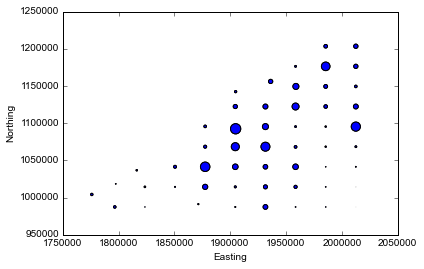

In [11]:
tc = ip.ident_points.ix[ip.ident_points.zone == 15]
fig, ax = ip.plot_spatial(tc, nsingular=50)